## We will now start coding in python! We are going to load our counts data from featureCounts and do some calculations

First we need to import all the python packages that we will use. We will do that in the following cell. WARNING you most likely won't have all these packages installed. If you get the error "Cannot import package name ...." You need to go back to your command line and install it on tscc.
Remember how we installed things before? Try conda, then bioconda, then pip. Once you have installed it on your command line on tscc, you will need to restart your kernel to refresh those changes (Kernel - Restart)


NOTE - since these are python specific packages, you will not be able to tell if they installed properly on your command line with

`which packagename`

Instead, you will first need to open python in your terminal with:

`python`

Then try to import it (this is the same thing you do in a Jupyter notebook)

`import packagename`

If you don't get any errors, then success! It is installed. To get out of python and back to your normal command line:

`quit()`

## Process data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# This notebook is linked to TSCC, so we can load data directly by providing 
# the full path of the file location on tscc. Change the directory below to match your path
directory = '/home/ucsd-train48/projects/featureCounts/'

In [4]:
# We are going to load the featurecounts file and assign it to the variable name: counts
# change the file name to match the filename you used in your featureCounts script
counts = pd.read_csv(directory+"hangauer.results.counts",sep="\t",index_col=0,
                    comment="#")
print counts.shape
counts.head()

(57820, 10)


,Chr,Start,End,Strand,Length,/home/ucsd-train48/scratch/star_alignment/DMSO_1_ATCACGAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DMSO_2_CGATGTAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_1_CAGATCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_2_CCGTCCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_3_GTGAAAAligned.sortedByCoord.out.bam
Geneid,,,,,,,,,,
ENSG00000223972.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11869;11872;11874;12010;12179;12595;12613;1261...,12227;12227;12227;12057;12227;12721;12697;1272...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,1756,0,0,0,0,0
ENSG00000227232.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14363;14363;14363;14404;14411;14970;14970;1497...,14829;14829;14829;14501;14502;15038;15038;1503...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,2073,16,19,43,38,61
ENSG00000243485.2,chr1;chr1;chr1;chr1;chr1;chr1,29554;30267;30366;30564;30976;30976,30039;30667;30503;30667;31109;31097,+;+;+;+;+;+,1021,0,0,0,0,0
ENSG00000237613.2,chr1;chr1;chr1;chr1;chr1,34554;35245;35277;35721;35721,35174;35481;35481;36081;36073,-;-;-;-;-,1219,0,0,0,0,0
ENSG00000268020.2,chr1;chr1;chr1,52473;53049;54830,53312;53067;54936,+;+;+,947,0,0,0,0,0


In [5]:
#Let's drop unnecessary columns

#Look at the column names in your dataframe above, we only want to keep Length and the four files
#containing the count information. Make sure the names that you have after drop below match the 
#column names that you want to eliminate

counts.drop(['Chr','Start','End','Strand'], 
           axis=1, inplace=True)
counts.head()

,Length,/home/ucsd-train48/scratch/star_alignment/DMSO_1_ATCACGAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DMSO_2_CGATGTAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_1_CAGATCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_2_CCGTCCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_3_GTGAAAAligned.sortedByCoord.out.bam
Geneid,,,,,,
ENSG00000223972.4,1756,0,0,0,0,0
ENSG00000227232.4,2073,16,19,43,38,61
ENSG00000243485.2,1021,0,0,0,0,0
ENSG00000237613.2,1219,0,0,0,0,0
ENSG00000268020.2,947,0,0,0,0,0


In [6]:
#We will save this counts matrix to use as the input for differential expression. 
#This will be saved in the directory called counts and will have the filename 
#counts_for_deseq2.csv
counts.to_csv(directory+'counts_for_deseq2.csv')

## Convert to RPKM

In [8]:
#Here is a handy function that will turn our counts matrix into RPKM

#You don't need to do anything here other than run the cell

def counts_to_rpkm(featureCountsTable):
    counts = featureCountsTable.ix[:,1:]
    lengths = featureCountsTable['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

In [9]:
rpkm = counts_to_rpkm(counts)
print rpkm.shape
rpkm.head()

/home/ucsd-train48/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(57820, 5)


,/home/ucsd-train48/scratch/star_alignment/DMSO_1_ATCACGAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DMSO_2_CGATGTAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_1_CAGATCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_2_CCGTCCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_3_GTGAAAAligned.sortedByCoord.out.bam
Geneid,,,,,
ENSG00000223972.4,0.00000,0.00000,0.00000,0.00000,0.000000
ENSG00000227232.4,0.16645,0.19754,0.48653,0.39146,0.682117
ENSG00000243485.2,0.00000,0.00000,0.00000,0.00000,0.000000
ENSG00000237613.2,0.00000,0.00000,0.00000,0.00000,0.000000
ENSG00000268020.2,0.00000,0.00000,0.00000,0.00000,0.000000


In [10]:
#To get rid of a lot of noise, we are going to drop rows that have RPKM less than 4

rpkm_filtered = rpkm.loc[rpkm.sum(axis=1) > 4]
print rpkm_filtered.shape
rpkm_filtered.head()

(13293, 5)


,/home/ucsd-train48/scratch/star_alignment/DMSO_1_ATCACGAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DMSO_2_CGATGTAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_1_CAGATCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_2_CCGTCCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_3_GTGAAAAligned.sortedByCoord.out.bam
Geneid,,,,,
ENSG00000225972.1,3.536305,3.360354,2.395971,2.296252,2.180988
ENSG00000225630.1,1.859109,1.383166,1.437873,1.186397,1.310025
ENSG00000237973.1,25.548955,22.711957,37.729128,41.229412,34.838786
ENSG00000229344.1,7.462606,7.363283,9.526564,9.926073,8.667303
ENSG00000240409.1,0.833456,1.978259,1.133106,1.031650,1.567783


In [11]:
#Now we will save the file. Note that it will go to the same location we defined as 
#directory above and it will be given the filename rpkm_filtered.csv
rpkm_filtered.to_csv(directory+"rpkm_filtered.csv")

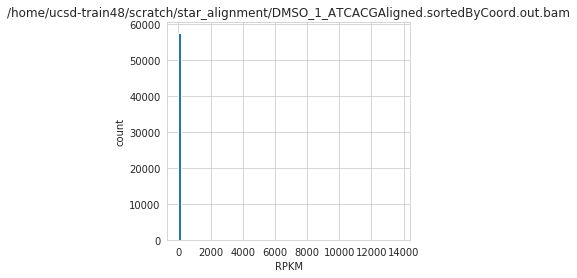

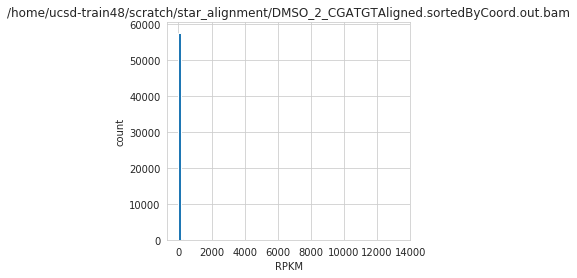

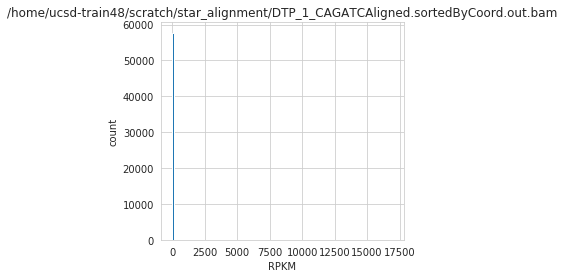

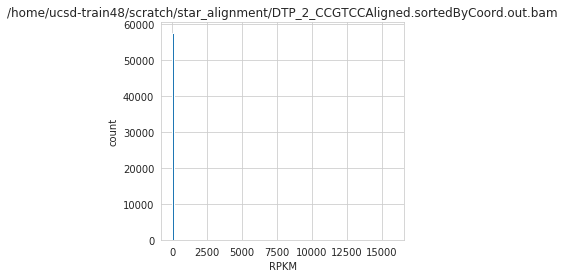

In [12]:

#Let's look at a histogram of the rpkm values for each sample.
#Notice how the vast majority cluster near zero. Let's tranfsorm our data to a log2 scale 
#for better viewing.
sns.set_style("whitegrid")
for i, a in zip(rpkm.columns, range(1,5)):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,a)
    plt.hist(rpkm[i], bins=100)
    plt.xlabel("RPKM")
    plt.ylabel("count")
    plt.title(i)


In [13]:

#Now let's take the log2RPKM. We will include a pseudocount to prevent inf values
rpkm_filtered+=1
rpkm_log2 = np.log2(rpkm_filtered)
print rpkm_log2.shape
rpkm_log2.head()

(13293, 5)


,/home/ucsd-train48/scratch/star_alignment/DMSO_1_ATCACGAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DMSO_2_CGATGTAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_1_CAGATCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_2_CCGTCCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_3_GTGAAAAligned.sortedByCoord.out.bam
Geneid,,,,,
ENSG00000225972.1,2.181518,2.124445,1.763824,1.720827,1.669475
ENSG00000225630.1,1.515566,1.252879,1.285623,1.128555,1.207909
ENSG00000237973.1,4.730583,4.567543,5.275347,5.400176,5.163450
ENSG00000229344.1,3.081102,3.064069,3.395963,3.449703,3.273114
ENSG00000240409.1,0.874565,1.574469,1.092956,1.022652,1.360523


In [14]:
#First we have to replace infinite values with 0 in order to plot a histogram

rpkm_log2.replace(to_replace='-inf', value=0, inplace=True)


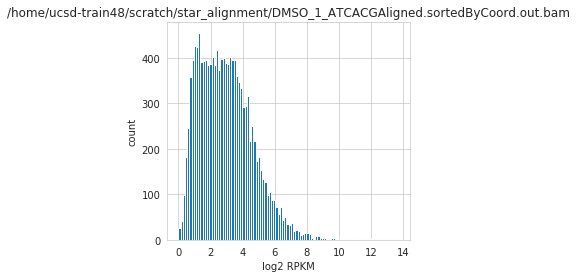

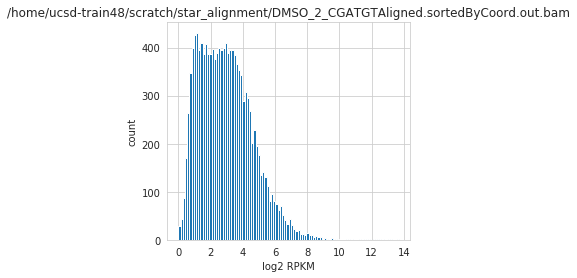

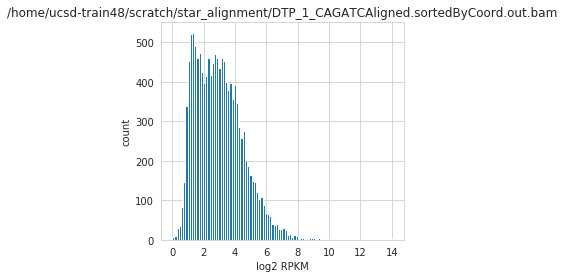

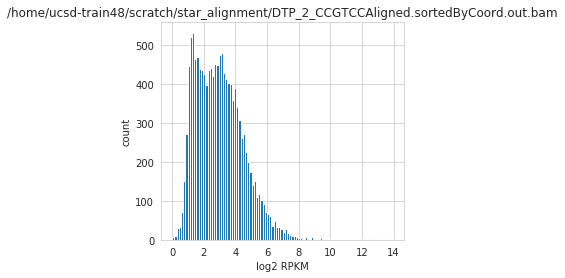

In [15]:

sns.set_style("whitegrid")
for i, a in zip(rpkm_log2.columns, range(1,5)):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,a)
    plt.hist(rpkm_log2[i], bins=100)
    plt.xlabel("log2 RPKM")
    plt.ylabel("count")
    plt.title(i)




In [18]:
#Let's filter again to remove rows where the average log2RPKM < 0

rpkm_log2_filtered = rpkm_log2.loc[rpkm_log2.mean(axis=1) > 0]
print rpkm_log2_filtered.shape
rpkm_log2_filtered.head()

(13293, 5)


,/home/ucsd-train48/scratch/star_alignment/DMSO_1_ATCACGAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DMSO_2_CGATGTAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_1_CAGATCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_2_CCGTCCAligned.sortedByCoord.out.bam,/home/ucsd-train48/scratch/star_alignment/DTP_3_GTGAAAAligned.sortedByCoord.out.bam
Geneid,,,,,
ENSG00000225972.1,2.181518,2.124445,1.763824,1.720827,1.669475
ENSG00000225630.1,1.515566,1.252879,1.285623,1.128555,1.207909
ENSG00000237973.1,4.730583,4.567543,5.275347,5.400176,5.163450
ENSG00000229344.1,3.081102,3.064069,3.395963,3.449703,3.273114
ENSG00000240409.1,0.874565,1.574469,1.092956,1.022652,1.360523


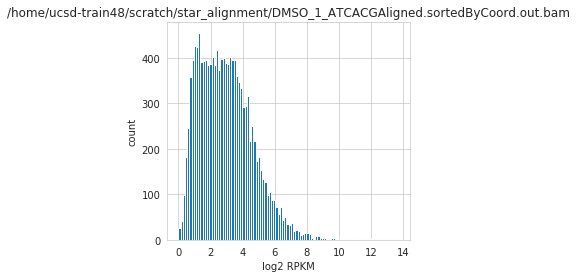

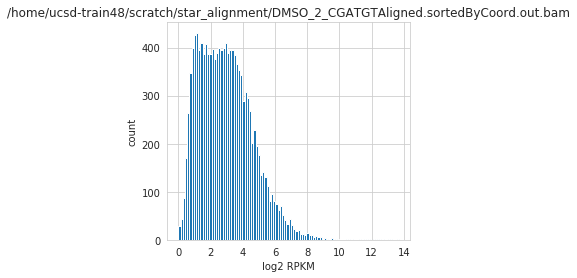

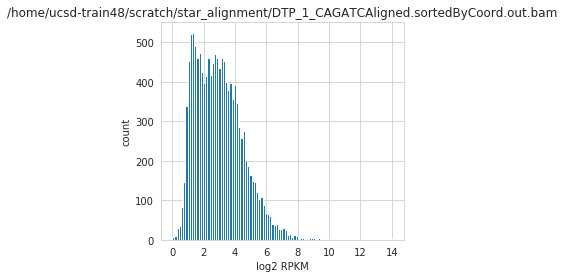

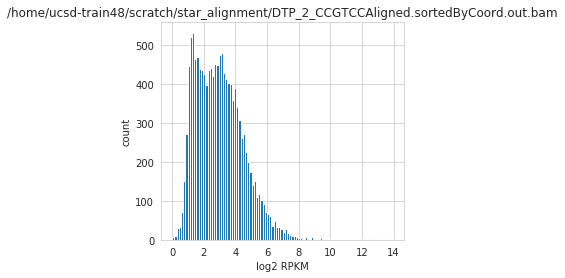

In [19]:
sns.set_style("whitegrid")
for i, a in zip(rpkm_log2_filtered.columns, range(1,5)):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,a)
    plt.hist(rpkm_log2_filtered[i], bins=100)
    plt.xlabel("log2 RPKM")
    plt.ylabel("count")
    plt.title(i)

In [20]:

#Now we will save the file. Note that it will go to the same location we defined as 
#directory above and it will be given the filename rpkm_log2_filtered.csv
rpkm_log2_filtered.to_csv(directory+"rpkm_log2_filtered.csv")

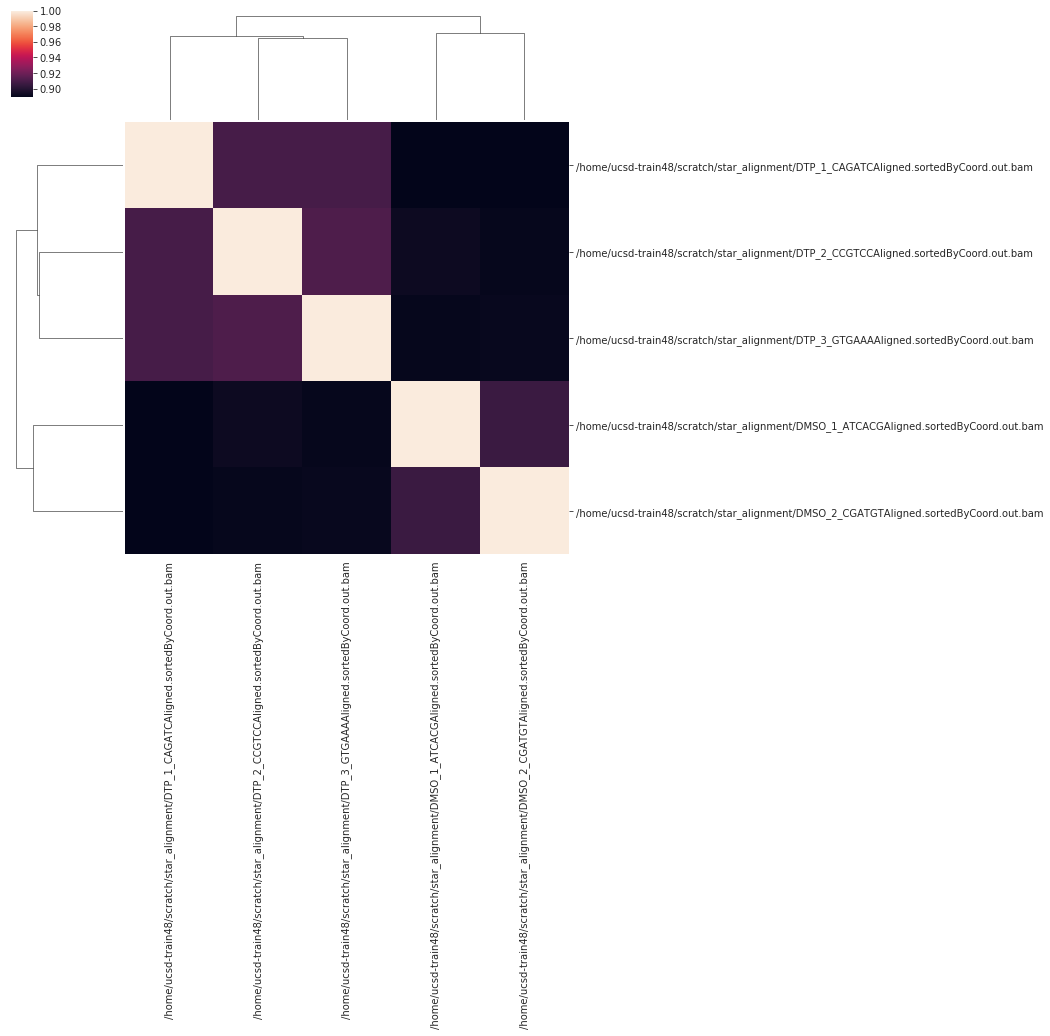

In [21]:
sns.clustermap(rpkm.corr(method='spearman'))

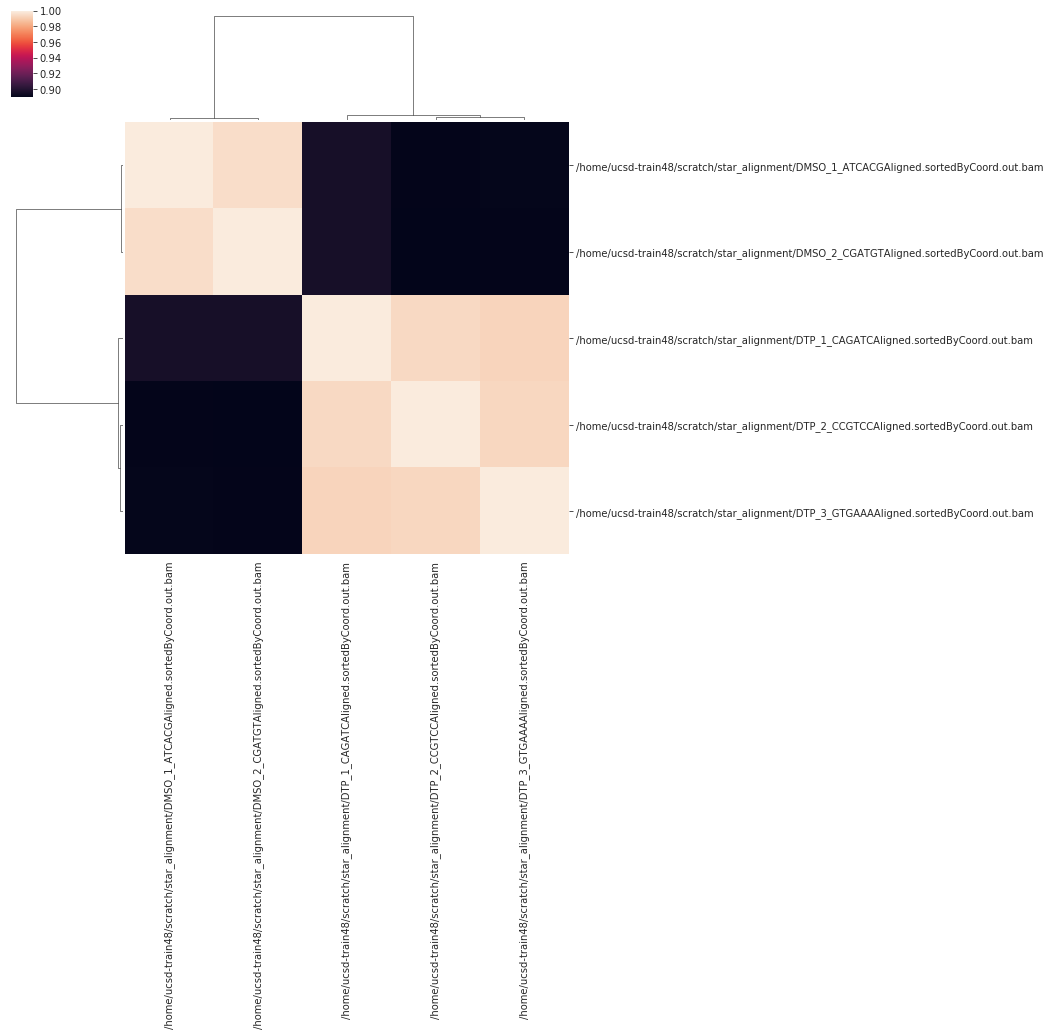

In [22]:
sns.clustermap(rpkm_filtered.corr(method='spearman'))